In [1]:
import mo_descriptor as md
import numpy as np

(11635, 3)
1 start clustering
2 start getting center


/home/dgg95223/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


[[34. 29. 21.]
 [34. 54. 38.]
 [66. 29. 38.]
 [66. 54. 21.]
 [34. 29. 38.]
 [34. 54. 21.]
 [66. 29. 21.]
 [66. 54. 38.]]


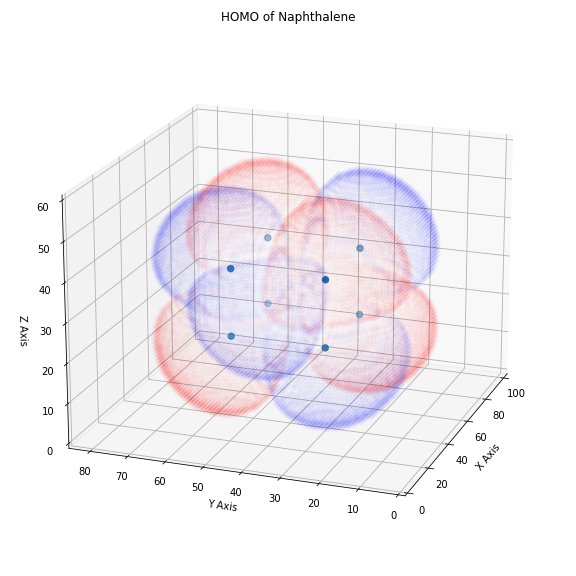

In [49]:
from cube2ovlp import load_cube, load_dat
nq, dq, value = load_cube('data/homo-s0.cube')
negative = []
positive = []
for ii, i in np.ndenumerate(value):
    if (i < -1.5e-3 and i > -2e-3):
        negative.append(ii)
    elif (i > 1.5e-3 and i < 2e-3):
        positive.append(ii)
print(np.array(negative).shape)
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt

b = md.MO_descriptor('data/homo-s0.cube').make()
c = b[:,0]
d = b[:,1:]
e = d / dq[0,0]
print(e)
X = e
Y = np.array(negative)
Z = np.array(positive)
# db = DBSCAN(eps=1, min_samples=5).fit_predict(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=40)
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c = 'red', alpha=0.01)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c = 'blue', alpha=0.01)
ax.set_xlim(0,102)
ax.set_ylim(0,84)
ax.set_zlim(0, 60)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('HOMO of Naphthalene')
plt.tight_layout()
ax.view_init(19,-160)
plt.show()
plt.savefig('test.jpg')